# Data Preprocessing :

## Importing Required Libraries

In [1]:
# Suppress warnings

import warnings
warnings.simplefilter("ignore")

# Data handling and processing

import pandas as pd  
import numpy as np  
from scipy import stats

# Data visualization

import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set()

# Data preprocessing

from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score


## Load Dataset

In [2]:
data = pd.read_csv("../data/raw/cardio_train.csv", sep=";")

### Data Cleaning

### Age Column
Issue: The age was recorded in days, leading to unusually high mean values.

Solution: Converted age from days to years by dividing the values by 365.

Technique Used: Unit transformation.

In [3]:
data['age'] = data['age'] // 365

### Blood Pressure (ap_hi, ap_lo)
Issue: Extreme and erroneous values (e.g., negative values for blood pressure). Solution: Removed rows with systolic blood pressure (ap_hi) outside 90–200 mmHg and diastolic blood pressure (ap_lo) outside 60–120 mmHg.

Technique Used: Threshold-based filtering which is commonly used to handle outliers, eliminate noise, or select relevant features.

In [4]:
data = data[(data['ap_hi'] >= 90) & (data['ap_hi'] <= 200)]
data = data[(data['ap_lo'] >= 60) & (data['ap_lo'] <= 120)]

### Cholesterol and Glucose (gluc)
Issue: Potential invalid entries; these columns should only contain categorical values (1, 2, 3).

Solution: Filtered rows where values in these columns were outside the valid range.

Technique Used: Value verification.

In [5]:
valid_categories = [1, 2, 3]
data = data[data['cholesterol'].isin(valid_categories)]
data = data[data['gluc'].isin(valid_categories)]

### Binary Variables (smoke, alco, active)
Issue: Binary variables should only contain 0 and 1; potential for incorrect values.

Solution: Verified and removed rows where these variables had values other than 0 or 1.

Technique Used: Value validation for binary features.

In [6]:
binary_columns = ['smoke', 'alco', 'active']
for col in binary_columns:
    data = data[data[col].isin([0, 1])]

### Rechecking After Cleaning

In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000,68418.000000
mean,49973.445292,52.831258,1.348782,164.368193,74.128091,126.644348,81.323584,1.364305,1.225628,0.087828,0.053334,0.803444,0.494797
std,28847.052002,6.768293,0.476588,8.182001,14.308865,16.374011,9.221299,0.678803,0.571655,0.283046,0.224700,0.397397,0.499977
min,0.000000,29.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74875.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

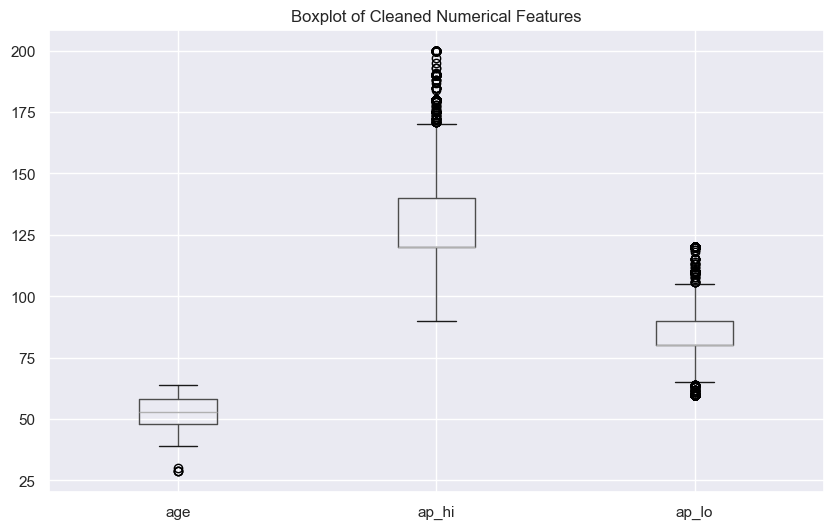

In [ ]:
# Boxplot for cleaned numerical features
data[['age', 'ap_hi', 'ap_lo']].boxplot(figsize=(10, 6))
plt.title("Boxplot of Cleaned Numerical Features")
plt.show()

### transfer the data to proprocess one

In [10]:
processed_data = data

In [11]:
# Save preprocessed data
processed_data.to_csv("../data/processed/processed_data.csv", index=False)

print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


In [12]:
print(processed_data.head())  # Check if data exists

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
